$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+2$$

The **global minimum** of this function is $f(0,0) = 0$. To avoid local mininma, we do the following:

In [7]:
# import the autoreload functionality
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from q3 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[-6.01901795e-09 -5.18258711e-09]


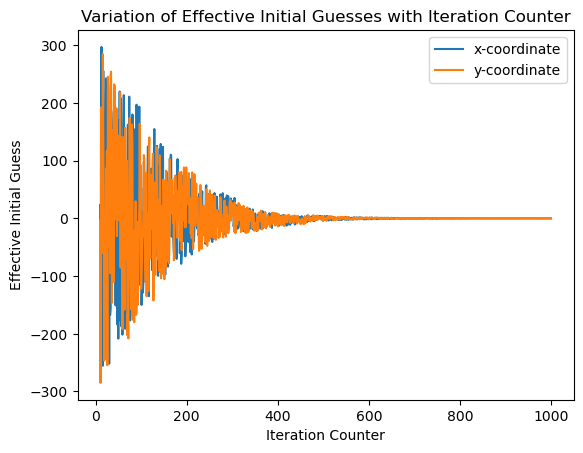

In [8]:
bounds = [-600, 600]  # Bounds for x1 and x2
tolerance = 1e-8  # Tolerance for convergence
warmup_iterations = 10  # Number of warm-up iterations
max_iterations = 1000  # Maximum number of iterations

result, initial_guesses = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

print(result)

x_values = [guess[0] for guess in initial_guesses]  # Extract the x-coordinate from each initial guess
y_values = [guess[1] for guess in initial_guesses]  # Extract the y-coordinate from each initial guess

plt.plot(range(warmup_iterations, max_iterations), x_values, label='x-coordinate')
plt.plot(range(warmup_iterations, max_iterations), y_values, label='y-coordinate')
plt.xlabel('Iteration Counter')
plt.ylabel('Effective Initial Guess')
plt.title('Variation of Effective Initial Guesses with Iteration Counter')
plt.legend()
plt.show()


In [9]:
#bounds = [-600, 600]  # Bounds for x1 and x2
#tolerance = 1e-8  # Tolerance for convergence
#warmup_iterations_list = [10, 100, 1000]  # Different values of warm-up iterations
#max_iterations = 1000  # Max number of iterations

#convergence_iterations = compare_convergence(bounds, tolerance, warmup_iterations_list, max_iterations)

#plt.plot(warmup_iterations_list, convergence_iterations)
#plt.xlabel('Warm-up Iterations')
#plt.ylabel('Convergence Iteration')
#plt.title('Convergence Behavior with Different Warm-up Iterations')
#plt.show()